In [19]:
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

In [20]:
!pip install ucimlrepo

In [21]:
from ucimlrepo import fetch_ucirepo 
  
wine_quality = fetch_ucirepo(id=186) 

  
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
X.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

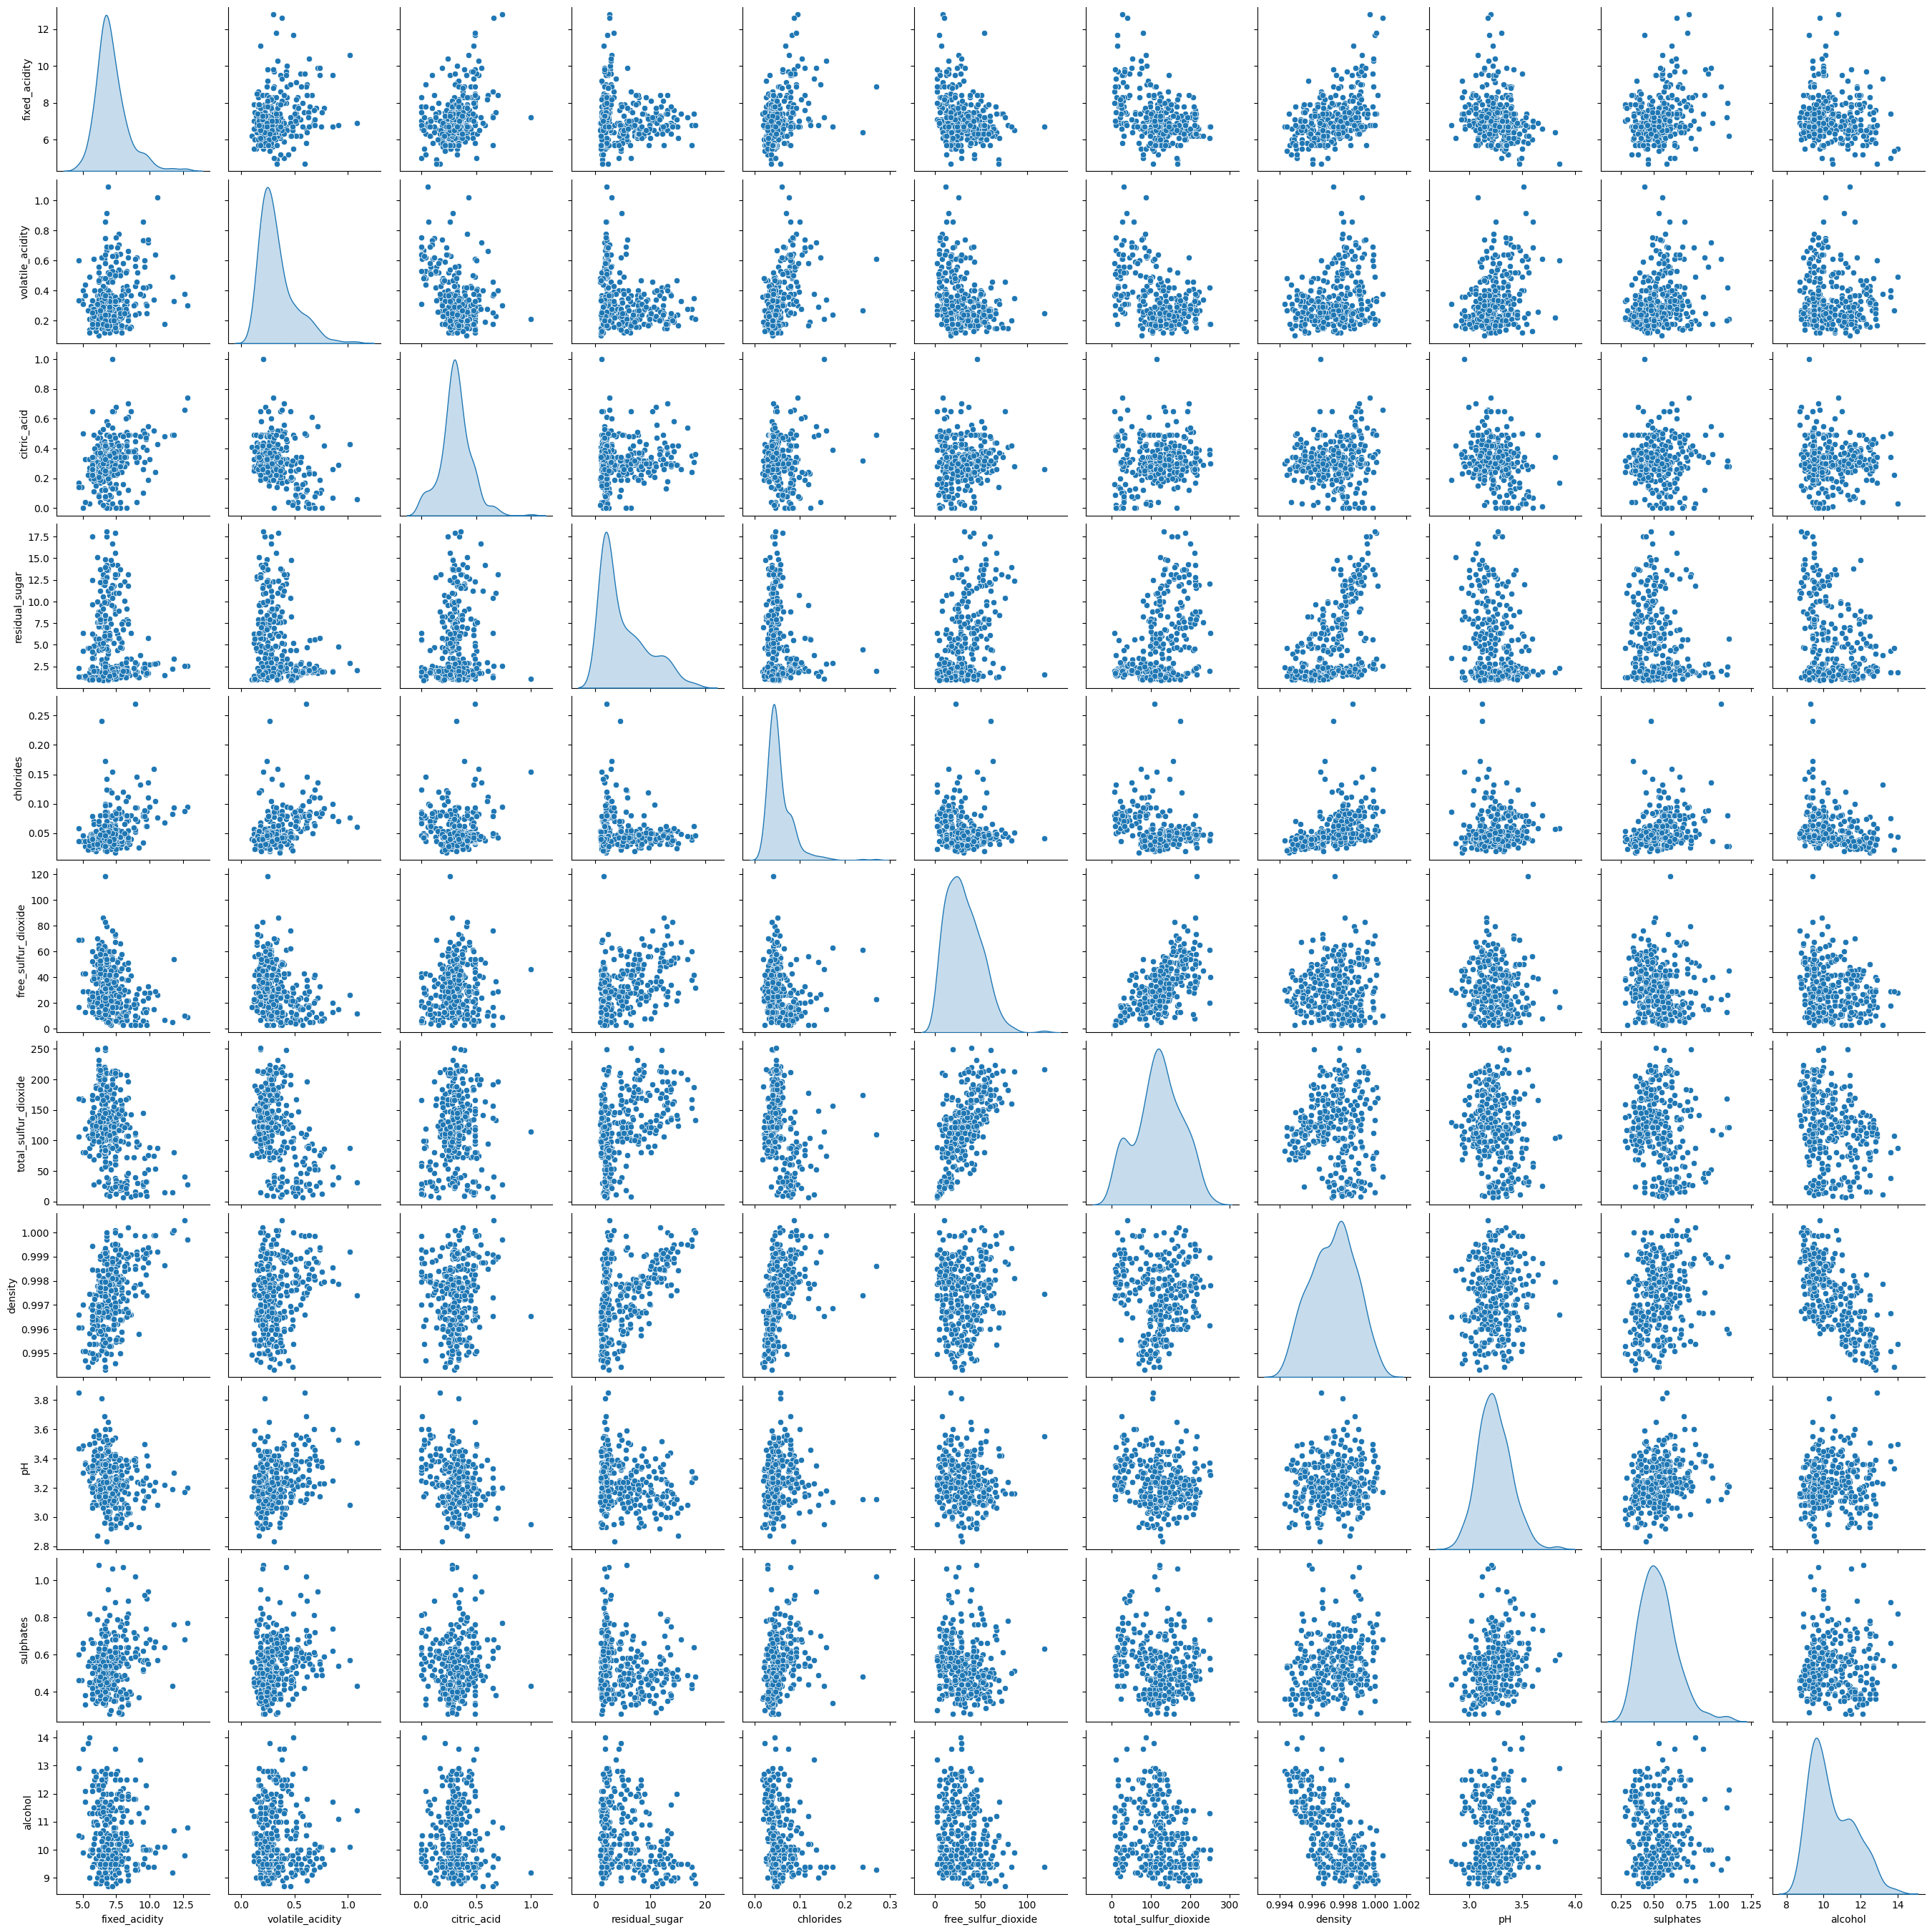

In [22]:
viz_df = X
viz_df.loc[:,'density'] = np.sqrt(viz_df['density'])
randomly_sampled_df = viz_df.sample(n=(math.ceil(len(viz_df)*.05)))

sns.pairplot(randomly_sampled_df, markers=['o', 's', 'D'], diag_kind='kde')
plt.show()

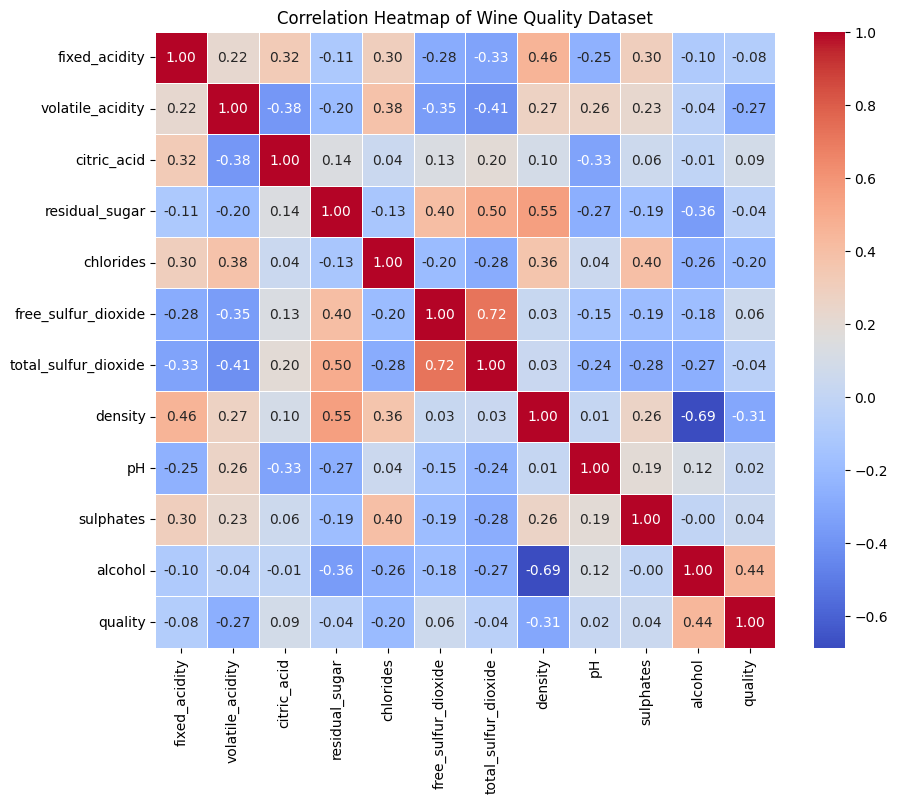

In [23]:
copy = X.copy()

import matplotlib.pyplot as plt

copy['quality'] = y
correlation_matrix = copy.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Wine Quality Dataset')
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression


copy_df = X.copy()
copy_df.drop(['pH'],axis=1, inplace=True)
copy_df.loc[:,'density'] = np.log(copy_df['density'])
X_array = copy_df.values
y_array = y.values


scaler = StandardScaler()
X_array.reshape(-1, 1)
X_array = scaler.fit_transform(copy_df)


X_train, X_test, y_train, y_test = train_test_split(X_array, y_array, test_size=0.1, random_state=42)


pca = PCA(n_components=.95)  
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


model = RandomForestRegressor()
model.fit(X_train_pca, y_train)


y_pred = model.predict(X_test_pca)
print(y_pred.dtype)


mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Percentage Error:", mape)
print("R^2 Score:", r2)


C:\Users\jrobe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


float64
Mean Squared Error: 0.34038769230769234
Mean Absolute Percentage Error: 0.07480734432234432
R^2 Score: 0.5259005541618178


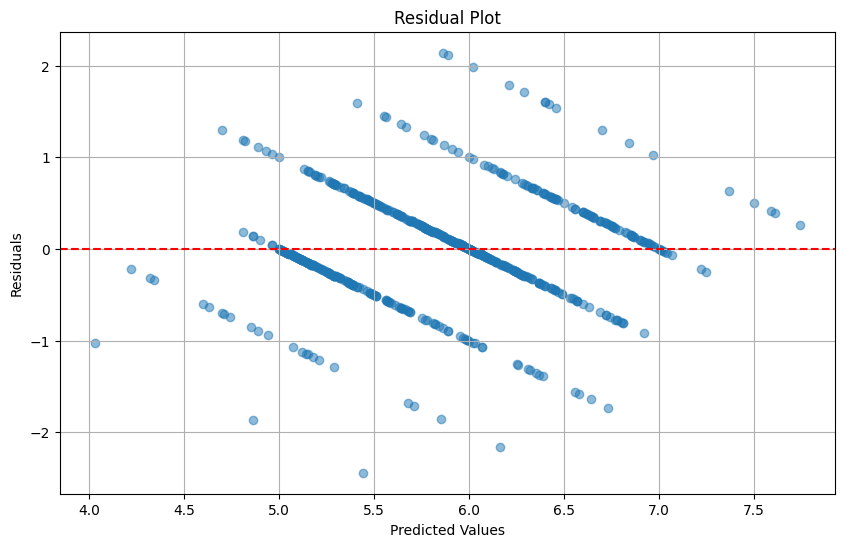

In [25]:
import matplotlib.pyplot as plt

y_pred = y_pred.reshape(-1,1)
residuals = y_test - y_pred


plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')  
plt.grid(True)
plt.show()